Import the required packages

In [71]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
import numpy as np

Load the dataset

In [72]:
_2k2k = loadmat('2k2k.mat')
trainIdx = _2k2k['trainIdx'].ravel() - 1
testIdx = _2k2k['testIdx'].ravel() - 1
train_data = _2k2k['fea'][trainIdx]
train_index = _2k2k['gnd'][trainIdx]
test_data = _2k2k['fea'][testIdx]
test_index = _2k2k['gnd'][testIdx]

PCA function implementation

In [73]:
def pca(data, n_components):
    # Center the data
    centered_data = data - np.mean(data, axis=0)
    # Calculate the covariance matrix
    covariance_matrix = np.dot(centered_data.T, centered_data)
    # Calculate eigenvalues and eigenvectors of the covariance matrix
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
    # Sort eigenvalues in descending order and get the corresponding indices
    sorted_indices = np.argsort(eigenvalues)[::-1]
    # Select the top n_components eigenvectors as principal components
    components = eigenvectors[:, sorted_indices[:n_components]]
    return components.real

In [74]:
components = pca(train_data, n_components=2)
train_reduction = train_data.dot(components)
test_reduction = test_data.dot(components)

Visualize dimensionality reduction results on a 2D plane

In [75]:
def visualization_2D(data, index, title):
    fig, ax = plt.subplots()
    scatter = ax.scatter(data[:, 0], data[:, 1], c=index, cmap='tab10')
    ax.legend(*scatter.legend_elements(), title='Digit')
    ax.set_title(title)
    plt.show()

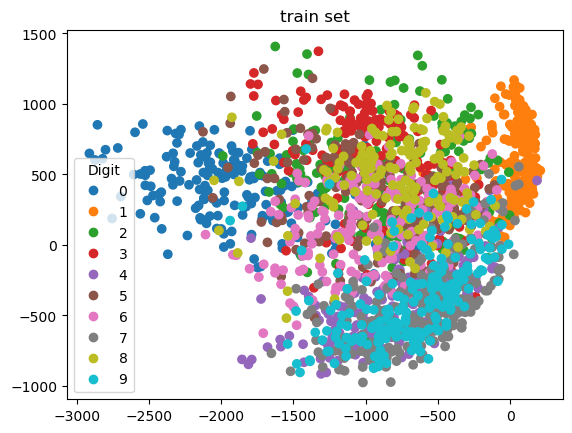

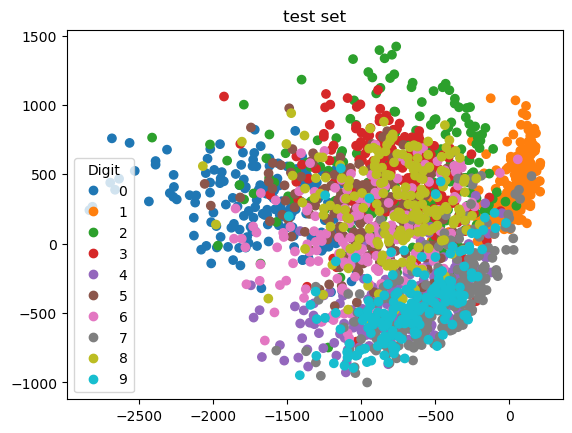

In [76]:
visualization_2D(train_reduction,train_index,'train set')
visualization_2D(test_reduction,test_index,'test set')

Compare it with the PCA algorithm in sklearn

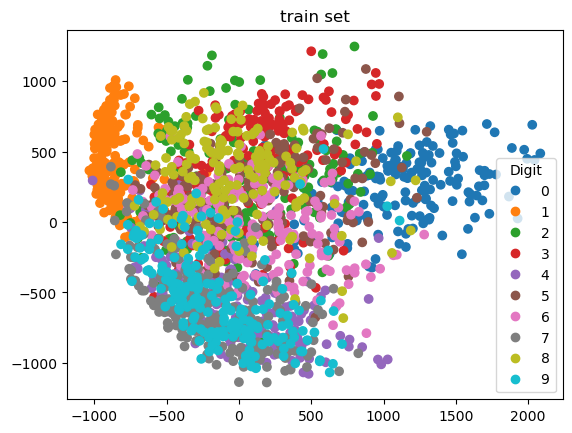

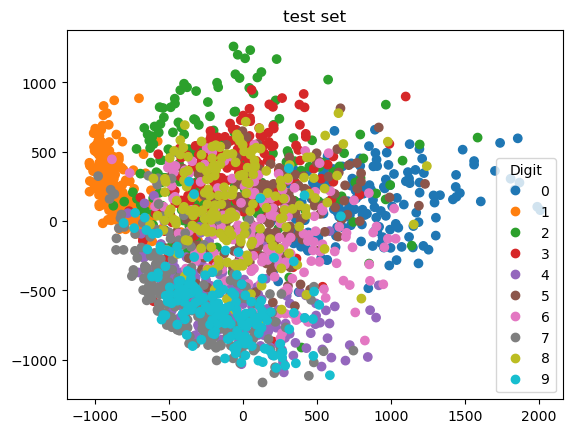

In [77]:
from sklearn.decomposition import PCA
# Perform PCA with 2 components
pca = PCA(n_components=2)
train_reduction_sklearn_pca = pca.fit_transform(train_data)
test_reduction_sklearn_pca = pca.transform(test_data)
visualization_2D(train_reduction_sklearn_pca,train_index,'train set')
visualization_2D(test_reduction_sklearn_pca,test_index,'test set')

It can be seen that our algorithm and the algorithm in sklearn are only slightly different in sign.
The two-dimensional distribution of scatter points is exactly the same.

Then we use the two principal components obtained to reconstruct the original image.

In [78]:
train_reconstruct = train_reduction.dot(components.T)
test_reconstruct = test_reduction.dot(components.T)

Reconstruct the image

In [79]:
def display_square_gray_images(image_data):
    num_images = image_data.shape[0]
    num_pixels = image_data.shape[1]
    num_rows = int(np.ceil(np.sqrt(num_images)))
    num_cols = int(np.ceil(num_images / num_rows))
    for i in range(num_images):
        img_data = image_data[i]
        img = img_data.reshape((int(np.sqrt(num_pixels)), int(np.sqrt(num_pixels))))
        plt.subplot(num_rows, num_cols, i + 1)
        plt.imshow(img, cmap='gray')
        plt.axis('off')
    plt.show()

Display the first hundred reconstructed images and compare them with the original images.
Here you can freely change the value in [:100] to show different image reconstruction effects.

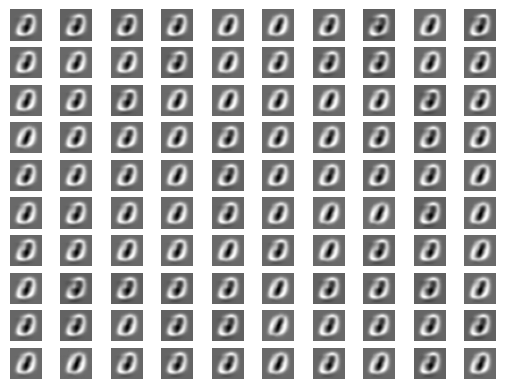

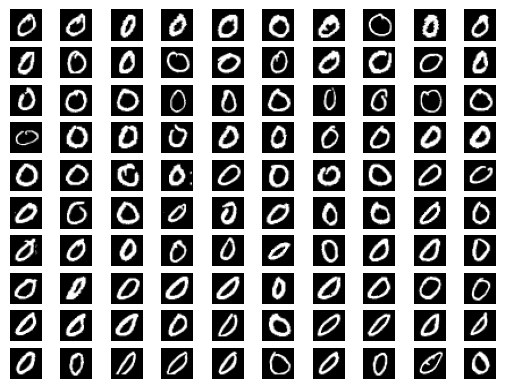

In [80]:
display_square_gray_images(train_reconstruct[:100])
display_square_gray_images(train_data[:100])

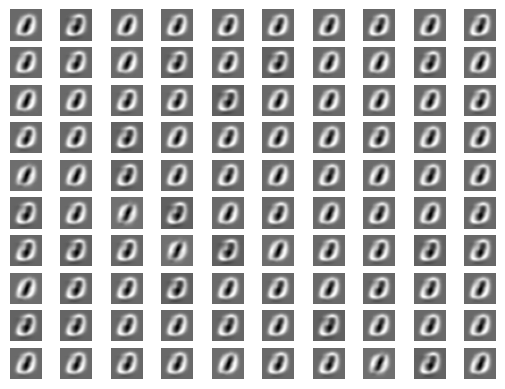

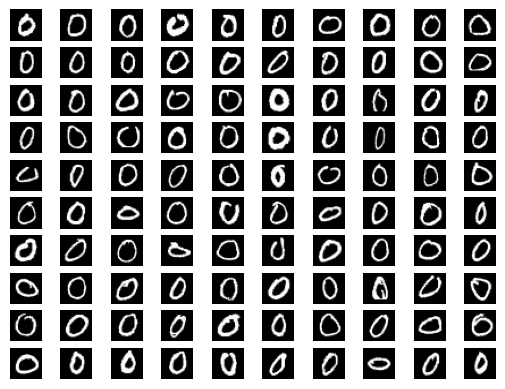

In [81]:
display_square_gray_images(test_reconstruct[:100])
display_square_gray_images(test_data[:100])

The reconstruction effect for the number 0 seems to be very good, but for other numbers with complex structures, the two-dimensional principal component may not achieve the desired effect.  
You can change the value of 'n_components' in our pca function to get more principal components for reconstruction. About ten dimensions can achieve good results.  
There is also a reconstruction function in sklearn's PCA algorithm, which can be reconstructed in the following way:  
train_reconstruct = pca.inverse_transform(train_reduction)  
test_reconstruct = pca.inverse_transform(test_reduction)  